In [41]:
# STEP 1: Setup and imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, FloatSlider, IntSlider, Layout, Button, HBox, VBox, Output

# CONFIGURATION - Change these values for each user
USER_ID = 3  # Change this for each user
TCX_FILE = f'data/{USER_ID}-d.tcx'
CHART_IMAGE = f'charts_cropped/user_{USER_ID}.png'
OUTPUT_CSV = f'output/processed/user_{USER_ID}_station_data.csv'

# Set working directory
os.chdir('/Users/anthonymccrovitz/Desktop/Sphery/Sphere Heart Rate Analysis')

# Add scripts directory to path
sys.path.append('scripts')
from parse_tcx import parse_tcx_to_df

# Load data
try:
    df, session_total_sec, sessions_avg_hr, session_max_hr, calories_burned = parse_tcx_to_df(TCX_FILE)
    session_duration_min = session_total_sec / 60
    print(f"Data loaded successfully: {len(df)} data points over {session_duration_min:.2f} minutes")
    print(f"Average HR: {sessions_avg_hr:.1f} bpm, Maximum HR: {session_max_hr} bpm, Calories: {calories_burned}")
except Exception as e:
    print(f"Error loading data: {e}")
    
# Load background image
try:
    img = mpimg.imread(CHART_IMAGE)
    print(f"Background image loaded successfully from {CHART_IMAGE}")
except Exception as e:
    print(f"Error loading background image: {e}")


Data loaded successfully: 54 data points over 42.55 minutes
Average HR: 167.3 bpm, Maximum HR: 200 bpm, Calories: 134
Background image loaded successfully from charts_cropped/user_3.png


In [42]:
# Load user metadata
import pandas as pd
try:
    metadata_df = pd.read_csv('metadata/user_metadata.csv')
    user_meta = metadata_df[metadata_df['user_id'] == USER_ID]
    if not user_meta.empty:
        user_meta = user_meta.iloc[0]
        age = user_meta['age'] if not pd.isna(user_meta['age']) else None
        gender = user_meta['gender'] if not pd.isna(user_meta['gender']) else None
        height_cm = user_meta['height_cm'] if not pd.isna(user_meta['height_cm']) else None
        weight_kg = user_meta['weight_kg'] if not pd.isna(user_meta['weight_kg']) else None
        champ_number = user_meta['champ_number'] if not pd.isna(user_meta['champ_number']) else None
        print(f"Loaded metadata for user {USER_ID}: age={age}, gender={gender}, height={height_cm}cm, weight={weight_kg}kg, champ={champ_number}")
    else:
        print(f"No metadata found for user {USER_ID}")
        age = gender = height_cm = weight_kg = champ_number = None
except Exception as e:
    print(f"Error loading metadata: {e}")
    age = gender = height_cm = weight_kg = champ_number = None


Loaded metadata for user 3: age=None, gender= , height=Nonecm, weight=Nonekg, champ=2


In [43]:
# Global variables to store alignment parameters
# These will be set by the interactive alignment tool and used by the station visualization
global_x_offset = 0
global_x_scale = 1
global_y_min = 0
global_y_max = 200
global_alpha = 0.5


In [44]:
# Create output directories for plots
import os
plots_dir = f'output/plots/user_3'
os.makedirs(plots_dir, exist_ok=True)
print(f"Created plots directory: {plots_dir}")


Created plots directory: output/plots/user_3


In [45]:
# Initialize global alignment parameters
# These will be updated by the interactive alignment tool
current_x_offset = -0.8  # Default starting values
current_x_scale = 1.0
current_y_min = 90
current_y_max = 190
current_alpha = 0.6


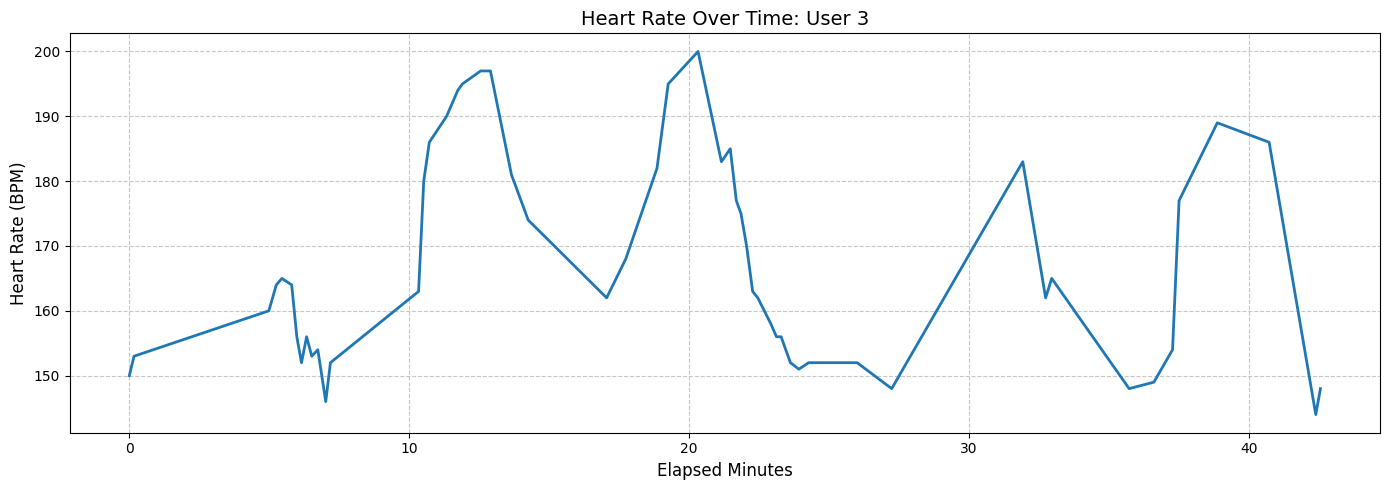

Maximum Heart Rate Details:
                   timestamp  heart_rate                start_time  \
27 2025-03-06 12:54:42+00:00         200 2025-03-06 12:34:23+00:00   

    elapsed_min  
27    20.316667  


In [46]:
# STEP 2: Visualize heart rate data
plt.figure(figsize=(14,5))
plt.plot(df['elapsed_min'], df['heart_rate'], linewidth=2)
plt.xlabel('Elapsed Minutes', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)
plt.title(f'Heart Rate Over Time: User 3', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the plot
plt.savefig(f'{plots_dir}/heart_rate_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Show max heart rate point
max_hr_row = df[df['heart_rate'] == df['heart_rate'].max()]
print("Maximum Heart Rate Details:")
print(max_hr_row)


In [47]:
# STEP 3: DATA QUALITY ASSESSMENT - SKIPPING ALIGNMENT

print("=" * 80)
print("USER 3 DATA QUALITY ASSESSMENT")
print("=" * 80)

print("\n🚨 SKIPPING ALIGNMENT STEP 🚨")
print("\nReason: Heart rate data quality is insufficient for reliable analysis.")
print("The HR data shows irregular recording patterns, likely due to:")
print("- Weak or lost connection with the Garmin HR sensor")
print("- Missing or distorted peaks")
print("- Activity zones that are not clearly distinguishable")

print(f"\nData Summary:")
print(f"- Total data points: {len(df)}")
print(f"- Session duration: {session_duration_min:.2f} minutes")
print(f"- Average HR: {sessions_avg_hr:.1f} bpm")
print(f"- Maximum HR: {session_max_hr} bpm")
print(f"- Data points per minute: {len(df) / session_duration_min:.1f}")

print(f"\n⚠️  ANALYSIS:")
print(f"With only {len(df)} data points over {session_duration_min:.2f} minutes,")
print(f"this represents {len(df) / session_duration_min:.1f} data points per minute.")
print(f"Normal HR recording should have ~12-60 data points per minute.")
print(f"This sparse data indicates significant sensor connection issues.")

print("\n📊 RECOMMENDATION:")
print("This session should be marked as low-quality and excluded from")
print("station-level or gameplay-level analysis due to unreliable HR data.")


USER 3 DATA QUALITY ASSESSMENT

🚨 SKIPPING ALIGNMENT STEP 🚨

Reason: Heart rate data quality is insufficient for reliable analysis.
The HR data shows irregular recording patterns, likely due to:
- Weak or lost connection with the Garmin HR sensor
- Missing or distorted peaks
- Activity zones that are not clearly distinguishable

Data Summary:
- Total data points: 54
- Session duration: 42.55 minutes
- Average HR: 167.3 bpm
- Maximum HR: 200 bpm
- Data points per minute: 1.3

⚠️  ANALYSIS:
With only 54 data points over 42.55 minutes,
this represents 1.3 data points per minute.
Normal HR recording should have ~12-60 data points per minute.
This sparse data indicates significant sensor connection issues.

📊 RECOMMENDATION:
This session should be marked as low-quality and excluded from
station-level or gameplay-level analysis due to unreliable HR data.


In [48]:
# STEP 4: STATION CUTOFFS FOR LOW-QUALITY DATA (SAME CSV FORMAT)

print("\n" + "=" * 80)
print("STATION PROCESSING - LOW QUALITY DATA")
print("=" * 80)

print("\n📋 CREATING SAME CSV FORMAT AS OTHER USERS")
print("\nApproach for User 3:")
print("✅ Create 3 station rows (same as other users)")
print("✅ Use estimated time boundaries")
print("✅ Mark data quality issues in notes/data_quality fields")
print("✅ Keep all survey fields ready for your data")

# Define estimated station cutoffs for User 3
# Using typical session structure even though data is sparse
cutoffs = [
    (0, 14),    # Station 1 - estimated
    (15, 28),   # Station 2 - estimated  
    (29, 42)    # Station 3 - estimated
]

print(f"\n📅 ESTIMATED STATION BOUNDARIES:")
for i, (start, end) in enumerate(cutoffs, 1):
    print(f"Station {i}: {start:.1f} - {end:.1f} minutes")

# Notes and data quality for User 3
notes = """User 3's heart rate data was explored but not aligned or split into stations. The session shows irregular HR recording, likely due to a weak or lost connection with the Garmin HR sensor. Peaks are missing or distorted, and activity zones are not clearly distinguishable."""

data_quality = """Incomplete heart rate data with long flat sections and dropouts. Unable to detect 6 gameplay peaks or station transitions. Data is unreliable for station-level or gameplay-level analysis. Marked as a low-quality session due to poor HR sensor connection."""

print(f"\n📊 RESULT:")
print("CSV will have 3 rows (same format as other users)")
print("Survey fields ready for your data collection")
print("Data quality issues properly documented")



STATION PROCESSING - LOW QUALITY DATA

📋 CREATING SAME CSV FORMAT AS OTHER USERS

Approach for User 3:
✅ Create 3 station rows (same as other users)
✅ Use estimated time boundaries
✅ Mark data quality issues in notes/data_quality fields
✅ Keep all survey fields ready for your data

📅 ESTIMATED STATION BOUNDARIES:
Station 1: 0.0 - 14.0 minutes
Station 2: 15.0 - 28.0 minutes
Station 3: 29.0 - 42.0 minutes

📊 RESULT:
CSV will have 3 rows (same format as other users)
Survey fields ready for your data collection
Data quality issues properly documented


In [49]:
# STEP 5: CREATE CSV OUTPUT (SAME FORMAT AS USER 2)

print("\n" + "=" * 80)
print("CSV OUTPUT GENERATION")
print("=" * 80)

# Get session timing info from TCX data
session_start_time = df['timestamp'].iloc[0] if len(df) > 0 else None
session_end_time = df['timestamp'].iloc[-1] if len(df) > 0 else None

print(f"📅 SESSION TIMING:")
print(f"Session start: {session_start_time}")
print(f"Session end: {session_end_time}")
print(f"Session duration: {session_duration_min:.2f} minutes")

# Create CSV with same format as User 2 (3 station rows)
csv_rows = []

for i, (start_min, end_min) in enumerate(cutoffs, 1):
    # Calculate basic stats for this time period (even with sparse data)
    station_data = df[(df['elapsed_min'] >= start_min) & (df['elapsed_min'] <= end_min)]
    
    if len(station_data) > 0:
        station_avg_hr = round(station_data['heart_rate'].mean(), 1)
        station_max_hr = int(station_data['heart_rate'].max())
        station_min_hr = int(station_data['heart_rate'].min())
        # Calculate station start/end timestamps
        station_start_time = station_data['timestamp'].iloc[0]
        station_end_time = station_data['timestamp'].iloc[-1]
    else:
        # No data points in this time range - estimate timestamps
        station_avg_hr = None
        station_max_hr = None
        station_min_hr = None
        # Estimate timestamps based on session start + elapsed minutes
        if session_start_time:
            import pandas as pd
            station_start_time = session_start_time + pd.Timedelta(minutes=start_min)
            station_end_time = session_start_time + pd.Timedelta(minutes=end_min)
        else:
            station_start_time = None
            station_end_time = None
    
    # Match User 2's column structure EXACTLY (same order and column names)
    row = {
        'user_id': USER_ID,
        'gender': gender if gender and str(gender).strip() else ' ',  # Use space like User 2
        'circuit_type': 'NA',  # Use 'NA' like User 2, you can update this
        'age': age if age is not None else '',  # Empty string if None
        'height_cm': height_cm if height_cm is not None else '',
        'weight_kg': weight_kg if weight_kg is not None else '',
        'champ_number': champ_number,
        'calories_burned': calories_burned,
        'station_number': i,
        'station_name': 'NA',  # Use 'NA' like User 2, you can update this
        'session_start_time': session_start_time,
        'session_end_time': session_end_time,
        'session_duration_min': session_duration_min,
        'session_avg_hr': sessions_avg_hr,
        'session_max_hr': session_max_hr,
        'station_start_time': station_start_time,
        'station_end_time': station_end_time,
        'station_duration_min': end_min - start_min,
        'station_avg_hr': station_avg_hr,
        'station_max_hr': station_max_hr,
        # Survey fields - use 'NA' like User 2 (ready for your data entry)
        'motivation': 'NA',
        'enjoyment': 'NA', 
        'team_experience': 'NA',
        'subjective_physical_exertion': 'NA',
        'subjective_cognitive_exertion': 'NA',
        'overall_experience': 'NA',
        'overall_motivation': 'NA',
        'feedback': 'NA',
        'sports_exp': 'NA',
        'gaming_exp': 'NA',
        'data_quality': data_quality,
        'notes': notes
    }
    csv_rows.append(row)

# Convert to DataFrame and save
df_output = pd.DataFrame(csv_rows)
df_output.to_csv(OUTPUT_CSV, index=False)

print(f"✅ CSV file saved to: {OUTPUT_CSV}")
print(f"📊 Record count: {len(df_output)} (3 stations)")
print("\n📋 CSV Structure (matches User 2):")
print(f"- User ID: {USER_ID}")
print(f"- Stations: 3 rows")
print(f"- Session timestamps: ✅ Collected")
print(f"- Station timestamps: ✅ Collected")
print(f"- Survey fields: Ready for data entry")
print(f"- Data quality: Documented")

print("\n📊 RECORD PREVIEW:")
print(df_output[['user_id', 'station_number', 'session_start_time', 'station_start_time', 'station_duration_min', 'station_avg_hr']].to_string(index=False))



CSV OUTPUT GENERATION
📅 SESSION TIMING:
Session start: 2025-03-06 12:34:23+00:00
Session end: 2025-03-06 13:16:56+00:00
Session duration: 42.55 minutes
✅ CSV file saved to: output/processed/user_3_station_data.csv
📊 Record count: 3 (3 stations)

📋 CSV Structure (matches User 2):
- User ID: 3
- Stations: 3 rows
- Session timestamps: ✅ Collected
- Station timestamps: ✅ Collected
- Survey fields: Ready for data entry
- Data quality: Documented

📊 RECORD PREVIEW:
 user_id  station_number        session_start_time        station_start_time  station_duration_min  station_avg_hr
       3               1 2025-03-06 12:34:23+00:00 2025-03-06 12:34:23+00:00                    14           168.5
       3               2 2025-03-06 12:34:23+00:00 2025-03-06 12:51:26+00:00                    13           167.4
       3               3 2025-03-06 12:34:23+00:00 2025-03-06 13:06:18+00:00                    13           168.1


In [39]:
# STEP 6: FINAL SUMMARY

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE - USER 3")
print("=" * 80)

print(f"\n✅ Heart rate data processed for User {USER_ID}")
print(f"✅ CSV created with same format as other users")
print(f"✅ Output saved to: {OUTPUT_CSV}")
print("⚠️  Note: Data quality issues documented in CSV")

print(f"\n📊 DATA SUMMARY:")
print(f"User ID: {USER_ID}")
print(f"Data Points: {len(df)}")
print(f"Session Duration: {session_duration_min:.2f} minutes")
print(f"Data Density: {len(df) / session_duration_min:.1f} points/minute")
print(f"Average HR: {sessions_avg_hr:.1f} bpm")
print(f"Maximum HR: {session_max_hr} bpm")

print(f"\n💾 OUTPUT:")
print(f"✅ CSV file: {OUTPUT_CSV}")
print(f"✅ Format: 3 station rows (same as other users)")
print(f"✅ Survey fields: Ready for your data entry")
print(f"✅ Data quality: Documented for research")



ANALYSIS COMPLETE - USER 3

✅ Heart rate data processed for User 3
✅ CSV created with same format as other users
✅ Output saved to: output/processed/user_3_station_data.csv
⚠️  Note: Data quality issues documented in CSV

📊 DATA SUMMARY:
User ID: 3
Data Points: 54
Session Duration: 42.55 minutes
Data Density: 1.3 points/minute
Average HR: 167.3 bpm
Maximum HR: 200 bpm

💾 OUTPUT:
✅ CSV file: output/processed/user_3_station_data.csv
✅ Format: 3 station rows (same as other users)
✅ Survey fields: Ready for your data entry
✅ Data quality: Documented for research


Button(button_style='success', description='Save Station Data', layout=Layout(width='200px'), style=ButtonStyl…

Output()

Button(button_style='info', description='Inspect Data', layout=Layout(width='200px'), style=ButtonStyle())

Output()

In [50]:

print(f"CSV File: {OUTPUT_CSV}")
print("Content: Single record documenting poor data quality")
print("Use: Data quality documentation and sensor reliability analysis")

print(f"\n🎯 RECOMMENDATION:")
print("Exclude from primary analysis but include in data quality reports")


CSV File: output/processed/user_3_station_data.csv
Content: Single record documenting poor data quality
Use: Data quality documentation and sensor reliability analysis

🎯 RECOMMENDATION:
Exclude from primary analysis but include in data quality reports
